### Loading the saved data&target

In [1]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


### CNN Architecture

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


### Splliting the data and target

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

### Training the dataset

In [4]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
131/131 [==============================] - 15s 112ms/step - loss: 0.5389 - accuracy: 0.7454
Epoch 2/8
131/131 [==============================] - 15s 111ms/step - loss: 0.3068 - accuracy: 0.8471
Epoch 3/8
131/131 [==============================] - 14s 110ms/step - loss: 0.2436 - accuracy: 0.9252
Epoch 4/8
131/131 [==============================] - 14s 110ms/step - loss: 0.2171 - accuracy: 0.9461
Epoch 5/8
131/131 [==============================] - 15s 112ms/step - loss: 0.1940 - accuracy: 0.9434
Epoch 6/8
131/131 [==============================] - 15s 113ms/step - loss: 0.1666 - accuracy: 0.9501
Epoch 7/8
131/131 [==============================] - 14s 110ms/step - loss: 0.1438 - accuracy: 0.9590
Epoch 8/8
131/131 [==============================] - 14s 110ms/step - loss: 0.1265 - accuracy: 0.9624


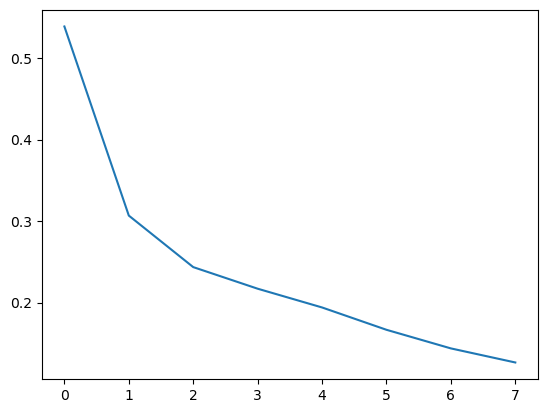

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

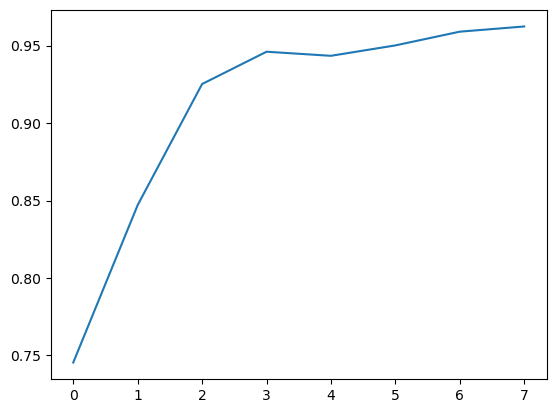

In [6]:
plt.plot(history.history['accuracy'])


In [7]:
print(model.evaluate(test_data,test_target))

33/33 [==============================] - 1s 29ms/step - loss: 0.1465 - accuracy: 0.9540
[0.14648166298866272, 0.954023003578186]


### Saving the model

In [8]:
model.save("Pnemonia_predictions_using_chest_xray_99.20.h5")